# Data Cleaning

In [1]:
#Importing Modules
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [2]:
#Reading and filtering files
games = pd.read_csv('Raw_Data\games.csv') #, index_col=['date'])
header = ['date','attendance', 'away_final_score', 'away_team', 'elapsed_time', 
          'home_final_score', 'home_team', 'start_time', 'venue_name',
          'weather', 'wind', 'delay']
games = games[7287:][header]   #only 2018 data is analyzed

#formatting dates to only month and date for the 2018 data
dates = pd.DatetimeIndex(games.date)
dates = dates.strftime('%B-%d')
games.date = dates

games.head()

,date,attendance,away_final_score,away_team,elapsed_time,home_final_score,home_team,start_time,venue_name,weather,wind,delay
7287,March-29,27764,5,ana,242,6,oak,1:07 PM,Oakland Coliseum,"73 degrees, partly cloudy","2 mph, Out to RF",0
7288,March-29,31042,4,bos,180,6,tba,4:00 PM,Tropicana Field,"72 degrees, dome","0 mph, None",0
7289,March-29,36517,14,cha,206,7,kca,3:16 PM,Kauffman Stadium,"45 degrees, overcast","10 mph, L to R",0
7290,March-29,32151,8,chn,198,4,mia,12:43 PM,Marlins Park,"75 degrees, partly cloudy","16 mph, In from RF",0
7291,March-29,47149,1,cle,155,2,sea,7:10 PM,Safeco Field,"55 degrees, cloudy","2 mph, In from CF",0


In [3]:
#Data Cleaning

#Venue_name of 'Angel Stadium' and 'Angel Stadium of Anaheim' are the same, will merge to be 'Angel Stadium'
games.venue_name[games.venue_name == 'Angel Stadium of Anaheim'] = 'Angel Stadium'

#The following three stadiums have less than 5 data points. Will be removed from this dataframe
#Stadiums: 'Hiram Bithorn Stadium', 'Estadio de Beisbol Monterrey', 'BB&T Ballpark'
index_name = games[games.venue_name == 'Hiram Bithorn Stadium'].index
games.drop(index_name, inplace=True)
index_name = games[games.venue_name == 'Estadio de Beisbol Monterrey'].index
games.drop(index_name, inplace=True)
index_name = games[games.venue_name == 'BB&T Ballpark'].index
games.drop(index_name, inplace=True)
len(games.venue_name.unique())

#Games with 1 attendance are dropped
index_name = games[games.attendance==1].index
games.drop(index_name, inplace=True)


C:\Users\johnl\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [4]:
#Creating Column for Temperatures only
temps = []
for each in games['weather']:
    temps.append(int(each.split(' ')[0]))
games['temperature'] = temps


#Creating Column for Weather condition only
weather_type = []
for each in games['weather']:
    weather_type.append(each.split('degrees, ')[1])
games['weather_type'] = weather_type

#Reassign roof closed to dome
games.weather_type = np.where((games.weather_type == 'roof closed'),'dome',games.weather_type)
games.weather_type.unique()

#Creating Column for Precipitation condition only
precipitation = []
for each in games['weather_type']:
    if each in ['clear', 'cloudy','dome', 'overcast', 'partly cloudy','sunny']:
        precipitation.append("No precipitation")
    else:
        precipitation.append("Precipitation")
games['precipitation'] = precipitation
games.precipitation.unique()
games.head()


#Creating Column for Wind Speed only
wind_speed = []
for each in games['wind']:
    wind_speed.append(int(each.split(' mph,')[0]))
games['wind_speed_mph'] = wind_speed

games.head()

,date,attendance,away_final_score,away_team,elapsed_time,home_final_score,home_team,start_time,venue_name,weather,wind,delay,temperature,weather_type,precipitation,wind_speed_mph
7287,March-29,27764,5,ana,242,6,oak,1:07 PM,Oakland Coliseum,"73 degrees, partly cloudy","2 mph, Out to RF",0,73,partly cloudy,No precipitation,2
7288,March-29,31042,4,bos,180,6,tba,4:00 PM,Tropicana Field,"72 degrees, dome","0 mph, None",0,72,dome,No precipitation,0
7289,March-29,36517,14,cha,206,7,kca,3:16 PM,Kauffman Stadium,"45 degrees, overcast","10 mph, L to R",0,45,overcast,No precipitation,10
7290,March-29,32151,8,chn,198,4,mia,12:43 PM,Marlins Park,"75 degrees, partly cloudy","16 mph, In from RF",0,75,partly cloudy,No precipitation,16
7291,March-29,47149,1,cle,155,2,sea,7:10 PM,Safeco Field,"55 degrees, cloudy","2 mph, In from CF",0,55,cloudy,No precipitation,2


# Weather Type Analysis
Does weather affect the attendance of a game?

What weather conditions are each field most likely to have? 

What are the optimal weather conditions to win a game? (Based on team strengths?)  (find out mean temps for specific stadiums and see if team scores more at those temperatures at other stadiums)

How does elapsed time of a game vary with the weather conditions? Are specific fields more liekly to experience delays?

In [5]:
"""headers = ['date', 'attendance', 'away_final_score', 'away_team',
       'elapsed_time', 'home_final_score', 'home_team', 'start_time',
       'venue_name', 'weather', 'wind', 'delay', 'temperature',
       'weather_type', 'wind_speed_mph', 'precipitation']"""

games.venue_name.unique()
venues = list(games.venue_name.unique())
len(venues)

30

In [6]:
header2 = ['attendance', 'away_final_score', 'away_team', 'elapsed_time', 
          'home_final_score', 'home_team', 'venue_name',
          'delay', 'weather_type', 'precipitation']

by_venue = games[header2].groupby('venue_name')
by_venue.get_group('Kauffman Stadium').weather_type.unique()
by_venue.get_group('Kauffman Stadium')

,attendance,away_final_score,away_team,elapsed_time,home_final_score,home_team,venue_name,delay,weather_type,precipitation
7289,36517,14,cha,206,7,kca,Kauffman Stadium,0,overcast,No precipitation
7313,17564,4,cha,174,3,kca,Kauffman Stadium,0,cloudy,No precipitation
7431,12324,0,sea,165,10,kca,Kauffman Stadium,0,overcast,No precipitation
7446,14850,8,sea,178,3,kca,Kauffman Stadium,0,cloudy,No precipitation
7461,14314,4,sea,168,2,kca,Kauffman Stadium,0,partly cloudy,No precipitation
...,...,...,...,...,...,...,...,...,...,...
9518,20286,9,min,204,6,kca,Kauffman Stadium,0,partly cloudy,No precipitation
9663,19262,1,cle,188,2,kca,Kauffman Stadium,0,clear,No precipitation
9673,15920,14,cle,196,6,kca,Kauffman Stadium,0,partly cloudy,No precipitation
9688,23324,4,cle,187,9,kca,Kauffman Stadium,0,cloudy,No precipitation


,Games
weather_type,
snow,1
drizzle,15
rain,22
overcast,143
sunny,255
dome,351
cloudy,441
clear,475
partly cloudy,707


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

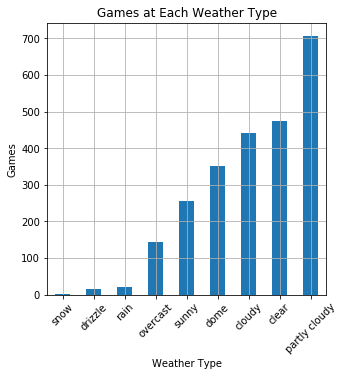

In [217]:
by_weather_elapsed_c = games[header2].groupby('weather_type').elapsed_time.count().sort_values()
by_weather_elapsed_c
aa = by_weather_elapsed_c
aa = aa.to_frame().reset_index()
aa= aa.set_index('weather_type')
aa.columns=['Games']
display(aa)
aa.plot(kind='bar', title = 'Games at Each Weather Type', legend=False, grid=True, figsize=(5,5))
plt.xlabel('Weather Type')
plt.ylabel('Games')
plt.xticks(rotation=45)



,Games
precipitation,
Precipitation,38
No precipitation,2372


(array([0, 1]), <a list of 2 Text xticklabel objects>)

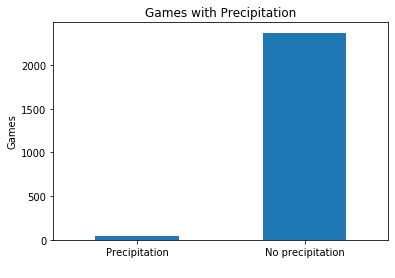

In [221]:
by_weather_elapsed_c = games[header2].groupby('precipitation').elapsed_time.count().sort_values()
by_weather_elapsed_c
aa = by_weather_elapsed_c
aa = aa.to_frame().reset_index()
aa= aa.set_index('precipitation')
aa.columns=['Games']
display(aa)
aa.plot(kind='bar', title = 'Games with Precipitation', legend=False)
plt.xlabel(' ')
plt.ylabel('Games')
plt.xticks(rotation=0)


# Weather Type & Precipitation Versus Attendence

,min,mean,max
weather_type,,,
dome,5265,"24,052.65",48115
rain,13389,"24,817.05",42050
overcast,7908,"25,505.78",48158
cloudy,7479,"29,332.76",53706
partly cloudy,5996,"29,561.04",50908
clear,7003,"30,534.38",56310
drizzle,16408,"30,539.47",45933
sunny,10431,"31,699.43",53797
snow,48216,"48,216.00",48216


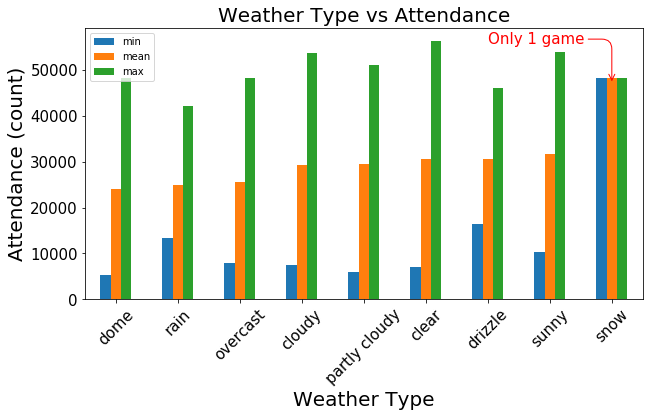

In [128]:
##### Plotting Weather Type versus min,mean,max attendance 

fig, ax = plt.subplots(figsize=(10,5))
games[header2].groupby('weather_type').attendance.agg(['min','mean','max']).sort_values('mean').plot(ax=ax, kind='bar')
ax.set_title("Weather Type vs Attendance",fontsize=20)
ax.set_xlabel('Weather Type', fontsize=20)
plt.xticks(fontsize=15, color='black', rotation=45)
ax.set_ylabel('Attendance (count)', fontsize=20)
plt.yticks(fontsize=15, color='black')                                                        

ax.annotate('Only 1 game', xy=(8,47000), xytext=(6,55000), fontsize=15,color='red',
             arrowprops=dict(arrowstyle='->',color='red', connectionstyle='angle,angleA=0, angleB=-90, rad=10'), 
             horizontalalignment='left', verticalalignment='bottom')

games[header2].groupby('weather_type').attendance.agg(['min','mean','max']).sort_values('mean')

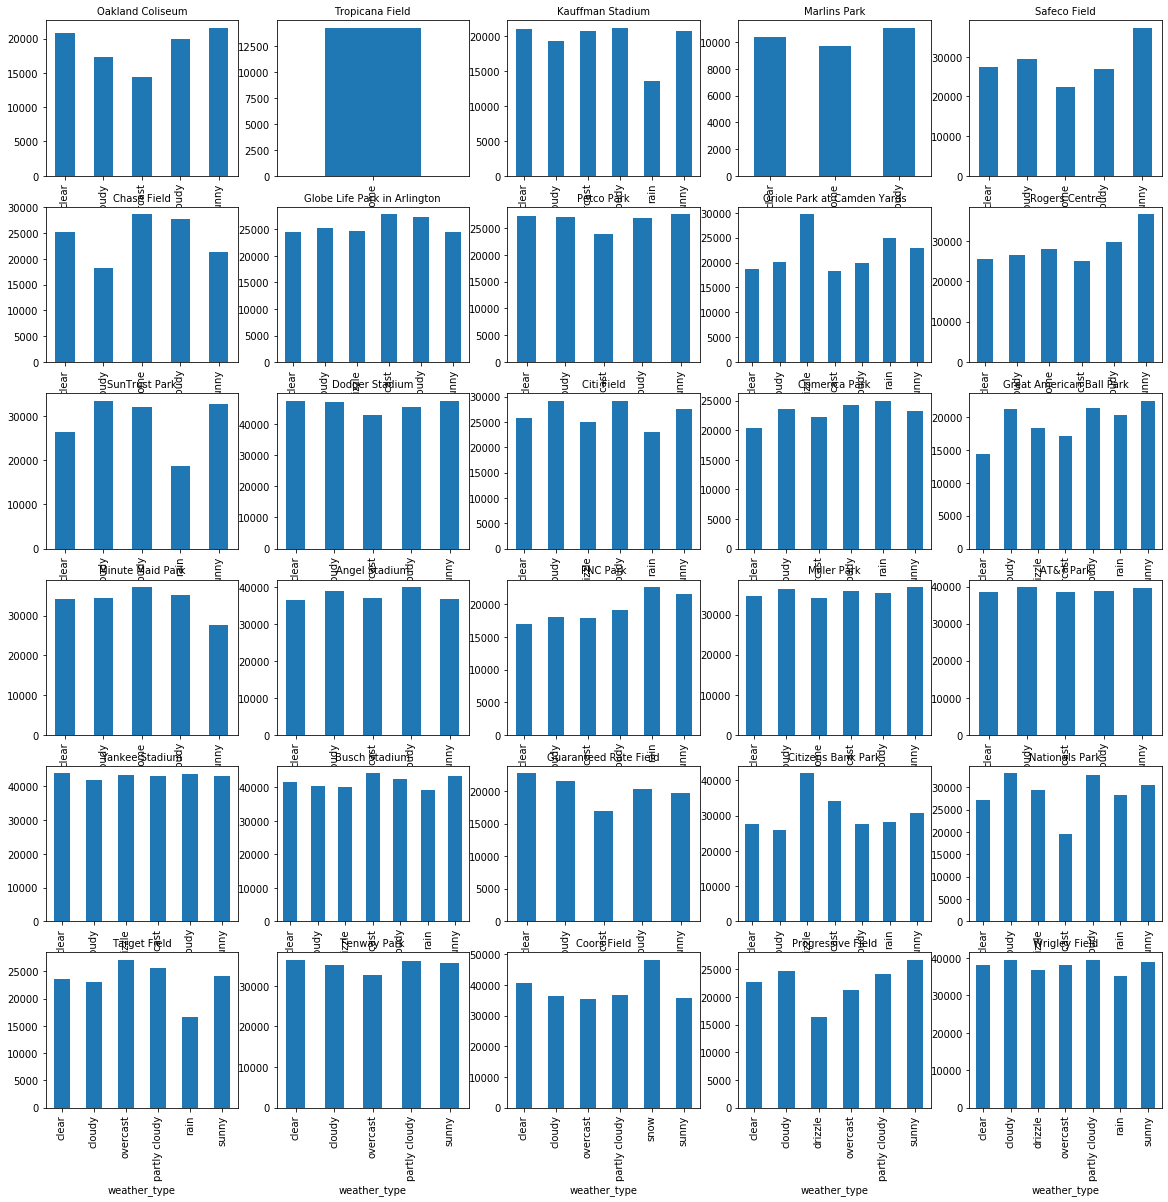

In [8]:
#Graphing weather type versus mean attendance at each venue
fig, ax = plt.subplots(6,5,figsize=(20,20))
venues=list(games.venue_name.unique())
count = 0

for i in range(0,6):
    for j in range(0,5):
        games_venue = games[header2][games.venue_name==venues[count]]
        ax[i,j]=games_venue.groupby('weather_type').attendance.agg(['mean']).plot(ax=ax[i,j],kind='bar',legend=False)
        ax[i,j].set_title(venues[count],fontsize=10)
        count+=1

,min,mean,max,count
precipitation,,,,
No precipitation,5265,"28,883.81",56310,2372
Precipitation,13389,"27,691.66",48216,38


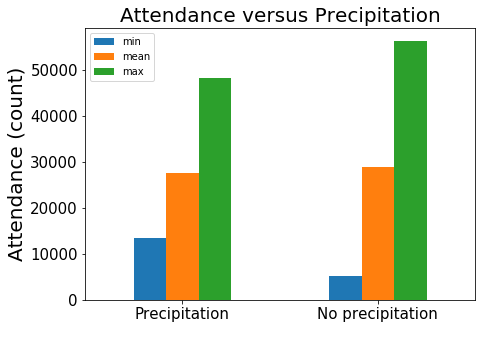

In [129]:
# Plotting Precipitation versus min,mean,max attendance 

fig, ax = plt.subplots(figsize=(7,5))
games[header2].groupby('precipitation').attendance.agg(['min','mean','max']).sort_values('mean').plot(ax=ax, kind='bar')
ax.set_title('Attendance versus Precipitation',fontsize=20)
ax.set_xlabel(' ', fontsize=20)
plt.xticks(fontsize=15, color='black', rotation=0)
ax.set_ylabel('Attendance (count)', fontsize=20)
plt.yticks(fontsize=15, color='black')         

by_weather_attend_c = games[header2].groupby('precipitation').attendance.count().sort_values()
by_weather_attend_c

games[header2].groupby('precipitation').attendance.agg(['min','mean','max','count'])

# Weather Type & Precipitation Versus Elapsed Time & Delay

weather_type
snow               1
drizzle           15
rain              22
overcast         143
sunny            255
dome             351
cloudy           441
clear            475
partly cloudy    707
Name: elapsed_time, dtype: int64

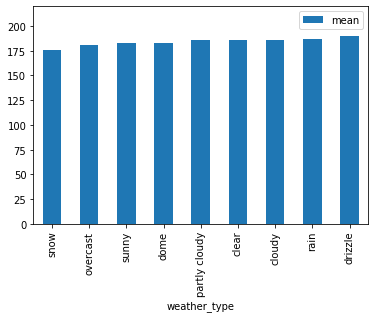

In [11]:
#Graphing Weather Type versus Elapsed Time

by_weather_elapsed_mmm = games[header2].groupby('weather_type').elapsed_time.agg(['mean']).sort_values('mean')
axs = by_weather_elapsed_mmm.plot(kind='bar',ylim=(0,220))

by_weather_elapsed_c = games[header2].groupby('weather_type').elapsed_time.count().sort_values()
by_weather_elapsed_c

# Weather Type Versus Delay

Text(0.5, 0, 'Weather Type')

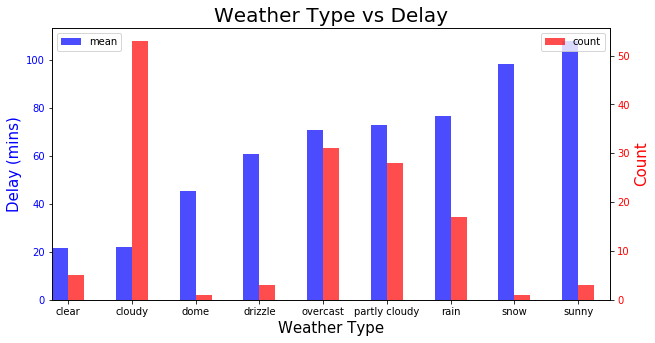

In [138]:
# Plotting Weather Type versus Delay 

fig, ax = plt.subplots(figsize=(10,5))

games[header2][games.delay > 0].groupby('weather_type').delay.agg(['mean']).sort_values('mean').plot(color='b', ax=ax, kind='bar', width=-1/4, align='edge',alpha=0.7, legend=False)
plt.yticks(fontsize=10, color='b')
ax.set_ylabel('Delay (mins)', fontsize=15,color='b')
ax.legend(loc='upper left')
plt.xticks(fontsize=10, color='black', rotation=0)

ax2=ax.twinx()
games[header2][games.delay > 0].groupby('weather_type').delay.agg(['count']).plot(ax=ax2, kind='bar', color='r', width=1/4, align='edge',alpha=0.7,  legend=False)
ax2.set_ylabel('Count', fontsize=15, color='r')
ax2.legend(loc='upper right')
plt.yticks(fontsize=10, color='r')

ax.set_title("Weather Type vs Delay",fontsize=20)
ax.set_xlabel('Weather Type', fontsize=15,)
     

,min,mean,max,count
precipitation,,,,
No precipitation,107,184.83,355,2372
Precipitation,104,187.61,254,38


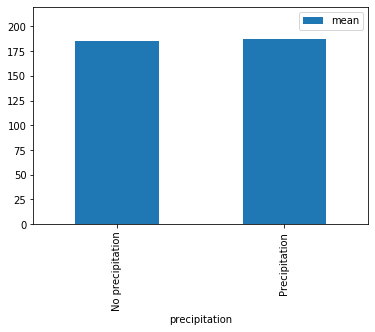

In [14]:
#Graphing precipitation versus Elapsed Time

by_precipitation_elapsed_mmm = games[header2].groupby('precipitation').elapsed_time.agg(['mean']).sort_values('mean')
axs = by_precipitation_elapsed_mmm.plot(kind='bar',ylim=(0,220))

by_precipitation_elapsed_c = games[header2].groupby('precipitation').elapsed_time.count().sort_values()
by_precipitation_elapsed_c

games[header2].groupby('precipitation').elapsed_time.agg(['min','mean','max','count'])

,min,mean,max,count
precipitation,,,,
No precipitation,10,80.32,1860,121
Precipitation,25,80.38,175,21


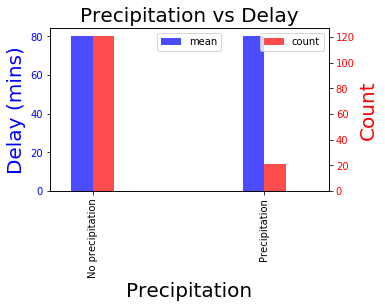

In [15]:
# Plotting Precipitation versus Delay 

fig, ax = plt.subplots(figsize=(5,3))

games[header2][games.delay > 0].groupby('precipitation').delay.agg(['mean']).sort_values('mean').plot(color='b', ax=ax, kind='bar', width=-1/8, align='edge',alpha=0.7, legend=False)
plt.yticks(fontsize=10, color='b')
ax.set_ylabel('Delay (mins)', fontsize=20,color='b')
ax.legend(loc='upper center')

ax2=ax.twinx()
games[header2][games.delay > 0].groupby('precipitation').delay.agg(['count']).plot(ax=ax2, kind='bar', color='r', width=1/8, align='edge',alpha=0.7,  legend=False)
ax2.set_ylabel('Count', fontsize=20, color='r')
ax2.legend(loc='upper right')
plt.yticks(fontsize=10, color='r')

ax.set_title("Precipitation vs Delay",fontsize=20)
ax.set_xlabel('Precipitation', fontsize=20,)
plt.xticks(fontsize=15, color='black')

games[header2][games.delay > 0].groupby('precipitation').delay.agg(['min','mean','max','count']).sort_values('mean')


# Precipitation Versus Venue

Text(0, 0.5, 'Games with Precipitation')

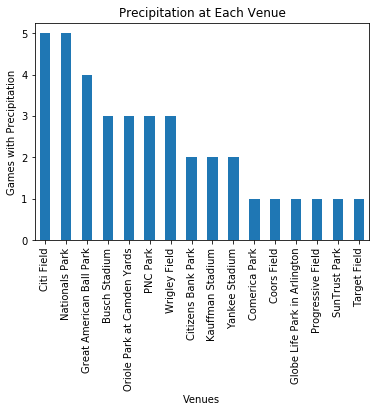

In [140]:
#Venues with Precipitation count

games_wet = games[games.precipitation=='Precipitation']
games_wet_by_venue = games_wet.groupby('venue_name').attendance.agg(['count']).sort_values('count', ascending=False)
games_wet_by_venue.plot(kind='bar', legend=False, title='Precipitation at Each Venue')
plt.xlabel('Venues')
plt.ylabel('Games with Precipitation')

# Weather Type & Precipitation Versus Team Performance

In [16]:
#Creating a dictionary of home games and team names
by_home_team = games.groupby('home_team')
team=list(games.home_team.unique())
team_venue_name = {}  #the dictionary
for each in team:
    team_venue_name[each] = [str(by_home_team.get_group(each).venue_name.unique())[2:-2]]
print(team_venue_name)

{'oak': ['Oakland Coliseum'], 'tba': ['Tropicana Field'], 'kca': ['Kauffman Stadium'], 'mia': ['Marlins Park'], 'sea': ['Safeco Field'], 'ari': ['Chase Field'], 'tex': ['Globe Life Park in Arlington'], 'sdn': ['Petco Park'], 'bal': ['Oriole Park at Camden Yards'], 'tor': ['Rogers Centre'], 'atl': ['SunTrust Park'], 'lan': ['Dodger Stadium'], 'nyn': ['Citi Field'], 'det': ['Comerica Park'], 'cin': ['Great American Ball Park'], 'hou': ['Minute Maid Park'], 'ana': ['Angel Stadium'], 'pit': ['PNC Park'], 'mil': ['Miller Park'], 'sfn': ['AT&T Park'], 'nya': ['Yankee Stadium'], 'sln': ['Busch Stadium'], 'cha': ['Guaranteed Rate Field'], 'phi': ['Citizens Bank Park'], 'was': ['Nationals Park'], 'min': ['Target Field'], 'bos': ['Fenway Park'], 'col': ['Coors Field'], 'cle': ['Progressive Field'], 'chn': ['Wrigley Field']}


In [17]:
#Most Common Weather Types at Each Venue
by_venue = games.groupby(['venue_name','weather_type']).away_final_score.agg(['count'])
by_venue.unstack()

count                                \
weather_type                 clear cloudy  dome drizzle overcast   
venue_name                                                         
AT&T Park                    17.00  10.00   nan     nan     3.00   
Angel Stadium                48.00   6.00   nan     nan     4.00   
Busch Stadium                20.00  13.00   nan    1.00     4.00   
Chase Field                  13.00   2.00 61.00     nan      nan   
Citi Field                   11.00  32.00   nan    3.00      nan   
Citizens Bank Park           18.00  25.00   nan    1.00     1.00   
Comerica Park                10.00  21.00   nan     nan     9.00   
Coors Field                  12.00  17.00   nan     nan     5.00   
Dodger Stadium               45.00   9.00   nan     nan     1.00   
Fenway Park                   8.00  29.00   nan     nan     1.00   
Globe Life Park in Arlington 31.00   7.00   nan    1.00    12.00   
Great American Ball Park      5.00  15.00   nan    1.00    16.00   
Guaranteed Rate Field         8.00  15.00   nan     nan    14.00   
Kauffman Stadium             29.00  14.00   nan     nan     5.00   
Marlins Park                  4.00    nan 60.00     nan      nan   
Miller Park                  10.00   7.00 32.00     nan     2.00   
Minute Maid Park              3.00   2.00 70.00     nan      nan   
Nationals Park               10.00  27.00   nan    3.00     1.00   
Oakland Coliseum             22.00  13.00   nan     nan     8.00   
Oriole Park at Camden Yards  14.00  19.00   nan    1.00     9.00   
PNC Park                      8.00  24.00   nan     nan     7.00   
Petco Park                   30.00   8.00   nan     nan     3.00   
Progressive Field            15.00  19.00   nan    1.00     7.00   
Rogers Centre                12.00   5.00 38.00     nan     1.00   
Safeco Field                 20.00  26.00  9.00     nan      nan   
SunTrust Park                 9.00  17.00   nan     nan      nan   
Target Field                 13.00  18.00   nan     nan    12.00   
Tropicana Field                nan    nan 81.00     nan      nan   
Wrigley Field                12.00  13.00   nan    1.00    15.00   
Yankee Stadium               18.00  28.00   nan    2.00     3.00   

                                                            
weather_type                 partly cloudy rain snow sunny  
venue_name                                                  
AT&T Park                            39.00  nan  nan 12.00  
Angel Stadium                        13.00  nan  nan 10.00  
Busch Stadium                        30.00 2.00  nan 11.00  
Chase Field                           4.00  nan  nan  1.00  
Citi Field                           20.00 2.00  nan 11.00  
Citizens Bank Park                   25.00 1.00  nan  7.00  
Comerica Park                        25.00 1.00  nan 14.00  
Coors Field                          37.00  nan 1.00  9.00  
Dodger Stadium                       13.00  nan  nan 14.00  
Fenway Park                          37.00  nan  nan  6.00  
Globe Life Park in Arlington         26.00  nan  nan  4.00  
Great American Ball Park             35.00 3.00  nan  6.00  
Guaranteed Rate Field                32.00  nan  nan 11.00  
Kauffman Stadium                     21.00 2.00  nan 10.00  
Marlins Park                         17.00  nan  nan   nan  
Miller Park                          16.00  nan  nan 14.00  
Minute Maid Park                      5.00  nan  nan  1.00  
Nationals Park                       33.00 2.00  nan  4.00  
Oakland Coliseum                     26.00  nan  nan 12.00  
Oriole Park at Camden Yards          27.00 2.00  nan  6.00  
PNC Park                             29.00 3.00  nan  7.00  
Petco Park                           27.00  nan  nan 10.00  
Progressive Field                    25.00  nan  nan 13.00  
Rogers Centre                        11.00  nan  nan 13.00  
Safeco Field                         18.00  nan  nan  8.00  
SunTrust Park                        46.00 1.00  nan  8.00  
Target Field   

In [225]:
#Table for each weather type and stadium with most frequent weather type
venue_weather = games[['venue_name','weather_type']][games.weather_type != 'dome']
az=venue_weather.groupby(['weather_type']).agg(lambda x:x.value_counts().index[0])  #counts the values and get first row, most
az.columns=['Most Frequent Venue w/ Weather Type']
az

,Most Frequent Venue w/ Weather Type
weather_type,
clear,Angel Stadium
cloudy,Citi Field
drizzle,Citi Field
overcast,Great American Ball Park
partly cloudy,SunTrust Park
rain,Great American Ball Park
snow,Coors Field
sunny,Wrigley Field


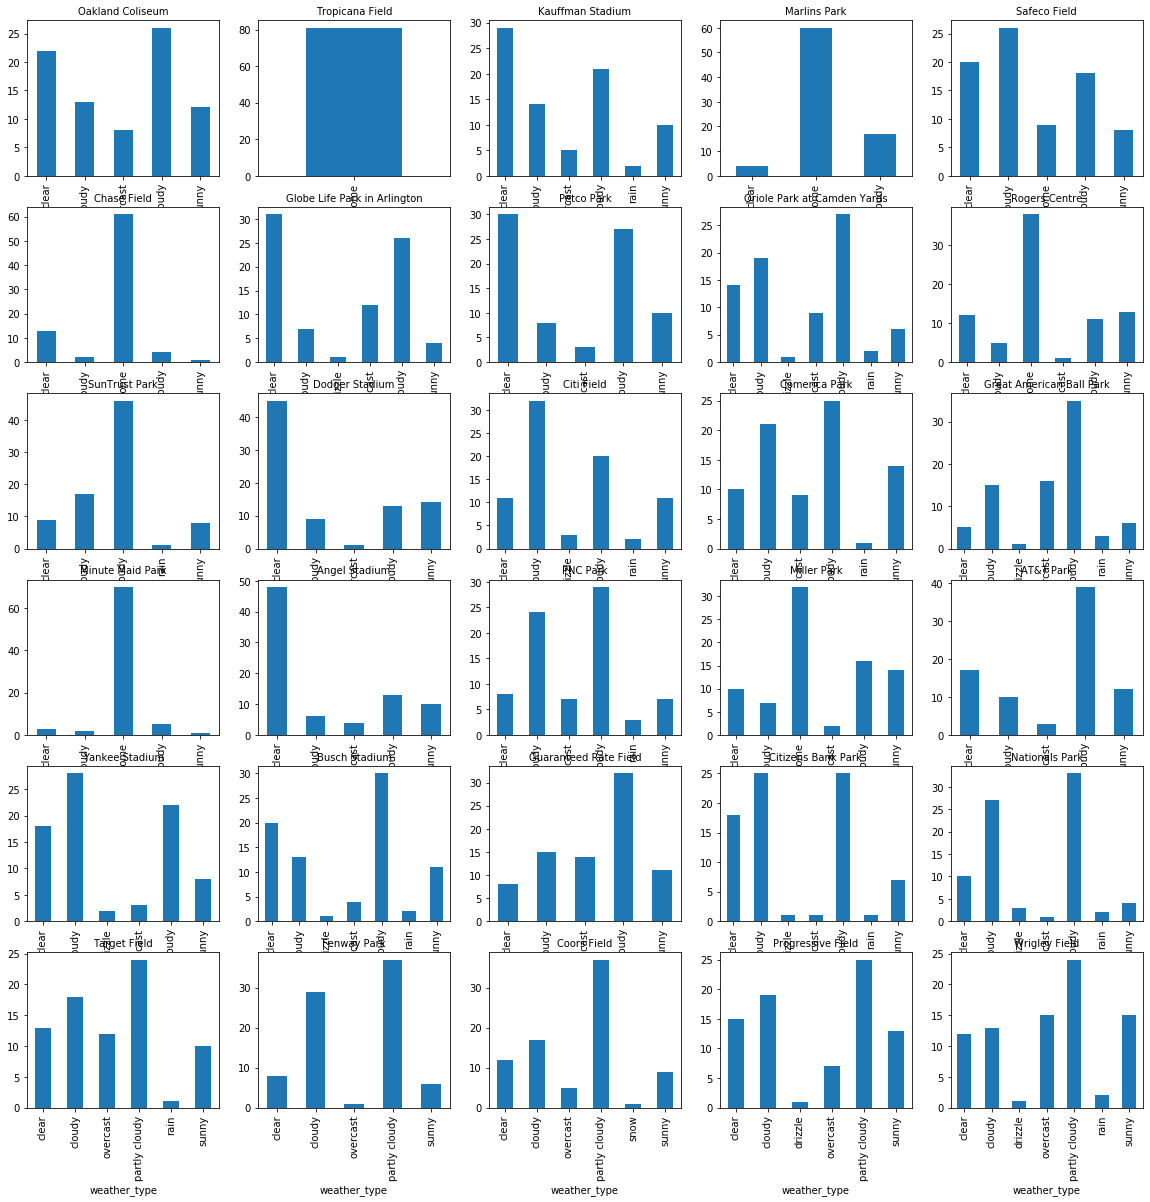

In [18]:
#Graphing frequency of weather type at each venue
fig, ax = plt.subplots(6,5,figsize=(20,20))
venues=list(games.venue_name.unique())
count = 0

for i in range(0,6):
    for j in range(0,5):
        games_venue = games[header2][games.venue_name==venues[count]]
        ax[i,j]=games_venue.groupby('weather_type').away_final_score.agg(['count']).plot(ax=ax[i,j],kind='bar',legend=False)
        ax[i,j].set_title(venues[count],fontsize=10)
        count+=1

In [19]:
#away team's average away final score at each weather type
games.groupby(['away_team', 'weather_type']).away_final_score.agg(['mean']).unstack()

mean                                                           
weather_type clear cloudy dome drizzle overcast partly cloudy rain snow sunny
away_team                                                                    
ana           4.00   4.70 3.07   11.00     5.67          5.32  nan  nan  4.22
ari           5.05   3.58 3.12     nan     3.67          4.16  nan  nan  3.71
atl           2.93   5.27 4.93   10.00     4.20          4.39 7.00 8.00  4.64
bal           2.69   3.65 3.33     nan     2.50          4.07 2.00  nan  3.43
bos           6.12   5.91 3.81     nan     2.67          4.70 7.00  nan  7.00
cha           3.68   4.75 3.80     nan     5.14          3.33  nan  nan  5.30
chn           5.75   4.62 4.78   10.00     2.75          4.37 1.00  nan  6.00
cin           3.20   5.77 2.83     nan     2.25          4.10  nan  nan  3.23
cle           4.38   4.94 3.00    2.00     3.38          5.76  nan  nan  4.75
col           2.87   5.13 4.00    6.00     1.00          4.53  nan  nan  3.55
det           3.57   4.39 3.75    5.00     3.40          3.19  nan  nan  2.67
hou           5.42   5.50 2.91     nan     4.50          6.04  nan  nan  5.60
kca           3.93   5.09 2.55     nan     3.56          4.00  nan  nan  3.00
lan           5.79   4.16 4.71    4.00     5.00          6.17  nan  nan  7.67
mia           3.30   3.39 2.89     nan     4.00          4.44 3.33  nan  5.00
mil           3.71   4.58 6.67     nan     4.25          5.26 6.00  nan  2.83
min           3.67   4.05 3.88     nan     4.00          5.19  nan  nan  3.09
nya           4.54   5.56 4.70    0.00     8.50          4.52 8.00  nan  5.33
nyn           4.15   4.77 4.18     nan     6.67          5.07 4.50  nan  4.00
oak           6.45   4.18 4.53     nan     5.67          5.64  nan  nan  5.33
phi           3.85   3.60 3.94    5.25     6.00          3.96 4.00  nan  2.50
pit           4.05   4.78 6.20     nan     4.38          5.00 9.00  nan  3.33
sdn           3.23   5.12 2.92    7.00     3.00          3.96 2.00  nan  2.80
sea           4.25   6.40 4.89     nan     4.80          3.68 1.00  nan  6.00
sfn           3.85   3.74 3.92     nan     1.67          3.00 5.00  nan  2.67
sln           6.27   3.90 4.80     nan     5.00          5.55 6.00  nan  5.00
tba           3.54   4.11 3.00     nan     3.57          5.75  nan  nan  4.00
tex           3.46   4.92 4.88    3.00     1.80          3.19  nan  nan  3.00
tor           4.00   4.52 3.53   12.00     4.33          4.42 6.00  nan  2.71
was           4.58   4.09 4.00     nan     6.00          4.60 2.00  nan  5.50

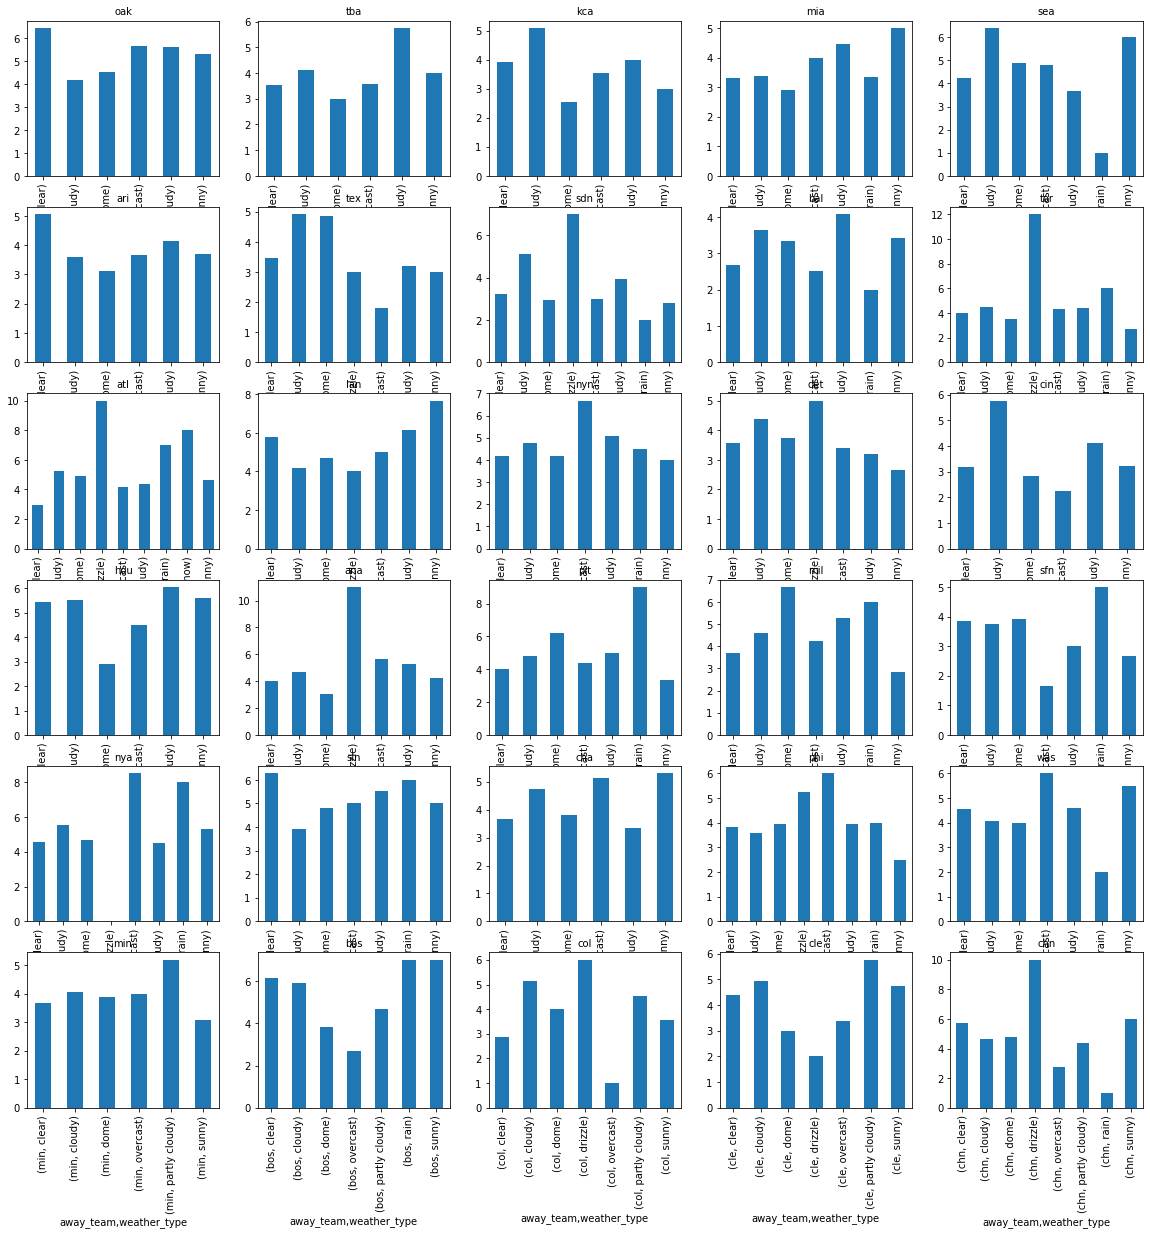

In [20]:
#Graphing average away_score at each weather type for each away team

team=list(games.home_team.unique())
fig, ax = plt.subplots(6,5,figsize=(20,20))
count=0

for i in range(0,6):
    for j in range(0,5):
        by_away_team = games[games.away_team==team[count]].groupby(['away_team', 'weather_type']).away_final_score.agg(['mean'])
        ax[i,j]=by_away_team.plot(ax=ax[i,j], kind='bar',legend=False)
        ax[i,j].set_title(team[count],fontsize=10)
        count+=1

In [223]:
#Most Common Precipitation at Each Venue
dfp = games.groupby(['venue_name','precipitation']).away_final_score.agg(['count'])
dfp=dfp.unstack().fillna(0).astype(int)
dfp['Percent']=dfp[('count','Precipitation')]/(dfp[('count','No precipitation')]+dfp[('count','Precipitation')])*100
zz=dfp.sort_values('Percent',ascending=False).head(5)
zz.columns=['Games w/o Precip.', 'Games w/ Precip.', '% of Games w/ Precip']
zz

,Games w/o Precip.,Games w/ Precip.,% of Games w/ Precip
venue_name,,,
Citi Field,74,5,6.33
Nationals Park,75,5,6.25
Great American Ball Park,77,4,4.94
Oriole Park at Camden Yards,75,3,3.85
PNC Park,75,3,3.85


In [168]:
#away team's average away final score at precipitation at any venue
by_venue2 = games.groupby(['away_team','precipitation']).away_final_score.agg(['mean'])
by_venue2 = by_venue2.unstack().fillna(0).astype(float)
aa = by_venue2.sort_values(('mean','Precipitation'),ascending=False).head(10)
# aa.columns[('mean score', 'No precipitation'), ('mean score',    'Precipitation')]
aa.columns = ['No Precipitation Mean Away Score', 'Precipitation Mean Away Score']
aa

,No Precipitation Mean Away Score,Precipitation Mean Away Score
away_team,,
ana,4.44,11.00
tor,4.06,9.00
pit,4.41,9.00
atl,4.40,8.33
bos,4.99,7.00
col,4.06,6.00
sln,5.03,6.00
mil,4.54,6.00
chn,4.64,5.50


In [177]:
#away team's number of away games with precipitation at any venue
teams_precip = ['tor','pit','atl','bos','col','sln','mil','chn','det']
games_away_team = games[games.away_team=='ana']
for team in teams_precip:
    df=games[games.away_team==team]
    games_away_team = games_away_team.append(df)

away_team_precip = games_away_team.groupby(['away_team','precipitation'],sort=False).away_final_score.agg(['count'])
ab = away_team_precip.unstack()
ab.columns = ['Games w/o Precip.','Games with Precip.']
ab

,Games w/o Precip.,Games with Precip.
away_team,,
ana,80,1
tor,78,2
pit,79,2
atl,78,3
bos,79,2
col,81,1
sln,80,1
mil,80,1
chn,78,2


In [227]:
teams_precip = ['tor','pit','atl','bos','col','sln','mil','chn','det']
games_away_team = games[games.away_team=='ana']
for team in teams_precip:
    df=games[games.away_team==team]
    games_away_team = games_away_team.append(df)

#away team's average away final score at precipitation at any venue
by_venue2 = games_away_team.groupby(['away_team','precipitation'], sort=False).away_final_score.agg(['mean'])
by_venue2 = by_venue2.unstack().fillna(0).astype(float)
by_venue2.sort_values(('mean','Precipitation'),ascending=False)

dfp2 = games.groupby(['away_team','precipitation']).away_final_score.agg(['count'])
dfp2=dfp2.unstack().fillna(0).astype(int)

ad=dfp2.merge(by_venue2,on='away_team')

ad.columns = ['Games w/o Precip.','Games with Precip.', 'Mean Score w/o Precip.',
              'Mean Score with Precip.']
ad = ad.sort_values('Mean Score with Precip.',ascending=False).head(10)

ad

,Games w/o Precip.,Games with Precip.,Mean Score w/o Precip.,Mean Score with Precip.
away_team,,,,
ana,80,1,4.44,11.00
pit,79,2,4.41,9.00
tor,78,2,4.06,9.00
atl,78,3,4.40,8.33
bos,79,2,4.99,7.00
col,81,1,4.06,6.00
mil,80,1,4.54,6.00
sln,80,1,5.03,6.00
chn,78,2,4.64,5.50


In [176]:
teams_precip = ['tor','pit','atl','bos','col','sln','mil','chn','det']
games_away_team = games[games.away_team=='ana']
for team in teams_precip:
    df=games[games.away_team==team]
    games_away_team = games_away_team.append(df)

#away team's average away final score at precipitation at any venue
by_venue2 = games_away_team.groupby(['away_team','precipitation'], sort=False).away_final_score.agg(['mean'])
by_venue2 = by_venue2.unstack().fillna(0).astype(float)
by_venue2.sort_values(('mean','Precipitation'),ascending=False)

dfp2 = games.groupby(['away_team','precipitation']).away_final_score.agg(['count'])
dfp2=dfp2.unstack().fillna(0).astype(int)
dfp2['Percent']=dfp2[('count','Precipitation')]/(dfp2[('count','No precipitation')]+dfp2[('count','Precipitation')])*100
dfp2.sort_values('Percent',ascending=False)

com2=dfp2.merge(by_venue2,on='away_team')

#weighted average = % P x Score P + (1-%P) x Score No P
com2['Weighted Average Score']=com2[('Percent','')]*com2[('mean','Precipitation')]/100 + (100-com2[('Percent','')])*com2[('mean', 'No precipitation')]/100

com2.sort_values('Weighted Average Score',ascending=False).head(10)
ac = com2.sort_values('Weighted Average Score',ascending=False).head(10)
ac.columns = ['Games w/o Precip.','Games with Precip.','% of Games with Precip', 'Mean Score w/o Precip.',
              'Mean Score with Precip.', 'Weighted Average Score']
ac

,Games w/o Precip.,Games with Precip.,% of Games with Precip,Mean Score w/o Precip.,Mean Score with Precip.,Weighted Average Score
away_team,,,,,,
bos,79,2,2.47,4.99,7.00,5.04
sln,80,1,1.23,5.03,6.00,5.04
chn,78,2,2.50,4.64,5.50,4.66
mil,80,1,1.23,4.54,6.00,4.56
atl,78,3,3.70,4.40,8.33,4.54
pit,79,2,2.47,4.41,9.00,4.52
ana,80,1,1.23,4.44,11.00,4.52
tor,78,2,2.50,4.06,9.00,4.19
col,81,1,1.22,4.06,6.00,4.09
